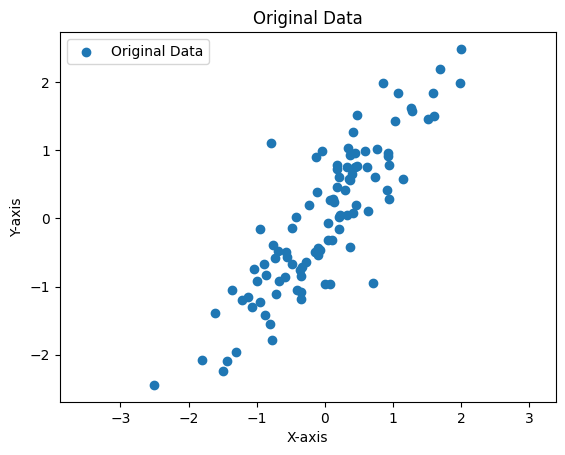

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

def generate_diagonal_points(num_points):
    X = np.random.randn(num_points, 2)
    X[:, 1] = X[:, 0] + 0.5 * np.random.randn(num_points)  # introducing diagonal direction
    return X

def generate_two_separate_clusters(num_points):
    X = np.random.randn(num_points, 2)
    X[:num_points//2, 0] += 3
    X[num_points//2:, 0] -= 3
    return X

def generate_points_on_a_line(num_points):
    X = np.random.randn(num_points, 2)
    X[:, 1] = X[:, 0]  # introducing diagonal direction
    return X


# Generate a set of points on the plane with approximately diagonal direction
np.random.seed(42)
num_points = 100

X = generate_diagonal_points(num_points)
# X = generate_two_separate_clusters(num_points)
# X = generate_points_on_a_line(num_points)

# Center the data
X -= np.mean(X, axis=0)

# Plot the original data
plt.scatter(X[:, 0], X[:, 1], label='Original Data')

plt.axis('equal')

plt.title('Original Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

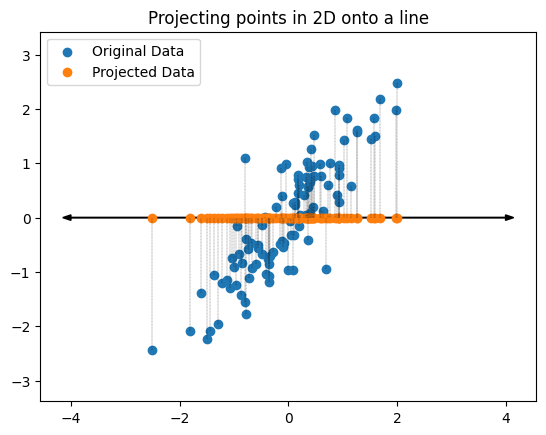

Variance of the projected data: 0.363


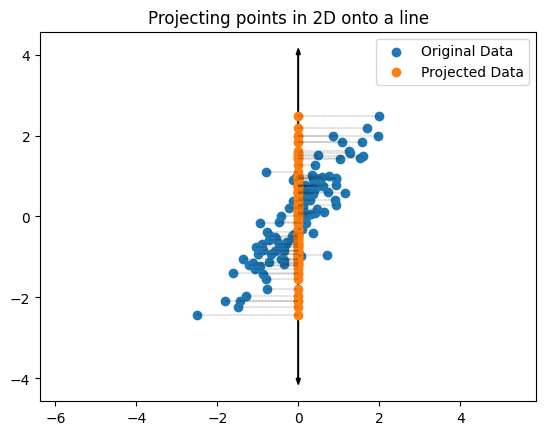

Variance of the projected data: 0.575


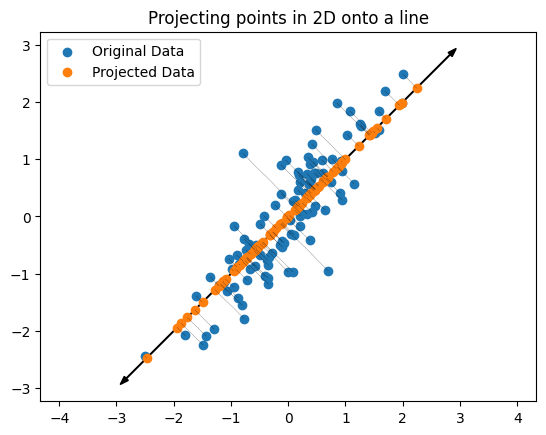

Variance of the projected data: 0.866


In [13]:

def project_points_on_unit_vector(X, line):
    # Normalize the vector
    line = line / np.linalg.norm(line)

    # Plot the original data
    plt.scatter(X[:, 0], X[:, 1], label='Original Data')
    
    # Project the data on the given line
    dot_product = np.dot(X, line)

    # # Compute the projection matrix onto the given line
    P = np.outer(dot_product, line)

    # The unit vector
    # plt.arrow(0, 0, line[0], line[1], color='black', width=0.1, head_width=0.1)
    
    # The line spanned by the unit vector
    scaling_factor = 4
    
    plt.arrow(0, 0, line[0] * scaling_factor, line[1] * scaling_factor, color='black', width=0.01, head_width=0.1)
    plt.arrow(0, 0, - line[0] * scaling_factor, - line[1] * scaling_factor, color='black', width=0.01, head_width=0.1)

    # Plot the projected data
    plt.scatter(P[:, 0], P[:, 1], label='Projected Data')

    # Show the projections (dashed, very thin)
    for i in range(len(X)):
        plt.plot([X[i, 0], P[i, 0]], [X[i, 1], P[i, 1]], 'k--', linewidth=0.2)


    plt.axis('equal')
    plt.title('Projecting points in 2D onto a line')
    plt.legend()
    plt.show()

    # Compute variance of the projected data
    var = np.var(P)
    print('Variance of the projected data: {:.3f}'.format(var))

vector1 = np.array([1,0])
vector2 = np.array([0,1])
vector3 = np.array([1,1])

project_points_on_unit_vector(X, vector1)
project_points_on_unit_vector(X, vector2)
project_points_on_unit_vector(X, vector3)


Principal component 1: Explains 93.74 % of the variance
Principal component 2: Explains 6.26 % of the variance


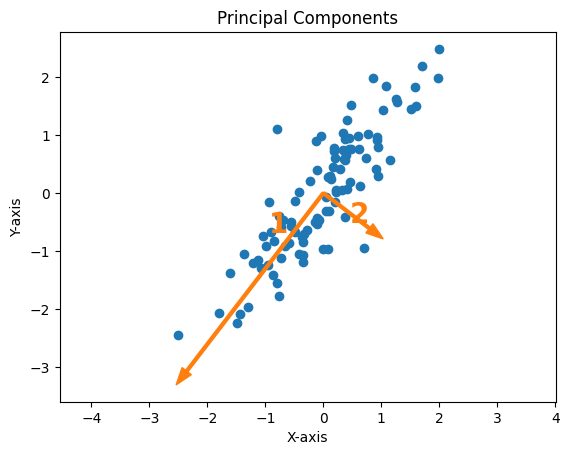

In [14]:
def compute_pca_svd(X):
    U, S, Vt = svd(X)
    # np.set_printoptions(precision=2)
    # print(f'U: {U.shape} \n\n', U, '\n')
    # print(f'S: {S.shape} \n\n', S, '\n')
    # print(f'Vt: {Vt.shape} \n\n', Vt, '\n')

    return U, S, Vt

def plot_principal_components(X, U, S, Vt, number_of_principal_components, show_unit_vectors_only=False):
    Vt = Vt[:number_of_principal_components, :]

    # Plot the original data
    plt.scatter(X[:, 0], X[:, 1], label='Original Data')

    # Compute how much variance is explained by each principal component
    var_explained = S ** 2 / np.sum(S ** 2)

    # Plot the principal components
    for i in range(number_of_principal_components):
        if show_unit_vectors_only:
            plt.arrow(0, 0, Vt[i, 0], Vt[i, 1], color='tab:orange', width=0.05, head_width=0.2)
        else:
            # With scaling for the variance explained
            scaling_factor = 4 * np.sqrt(var_explained[i])
            plt.arrow(0, 0, scaling_factor * Vt[i, 0], scaling_factor * Vt[i, 1], color='tab:orange', width=0.05, head_width=0.2)

        # add the label with the index of the principal component
        plt.text(Vt[i, 0], Vt[i, 1], str(i + 1), color='tab:orange', ha='right', va='bottom', fontsize=20, weight='bold')


        print('Principal component {}: Explains {:.2f} % of the variance'.format(i + 1, 100 * var_explained[i]))

    plt.axis('equal')
    plt.title('Principal Components')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

number_of_principal_components = 2
U, S, Vt = compute_pca_svd(X)
plot_principal_components(X, U, S, Vt, number_of_principal_components)


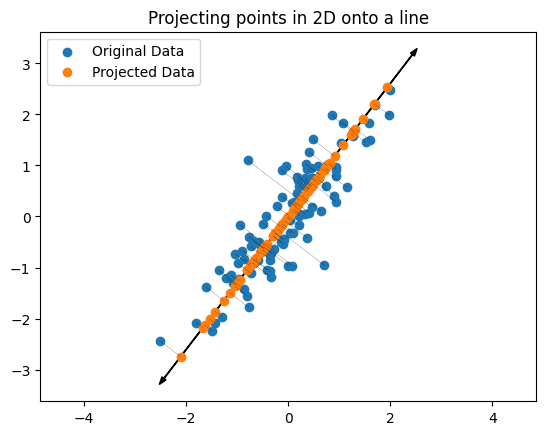

Variance of the projected data: 0.880


In [15]:
# Project the data onto the first principal component
project_points_on_unit_vector(X, Vt[0, :])

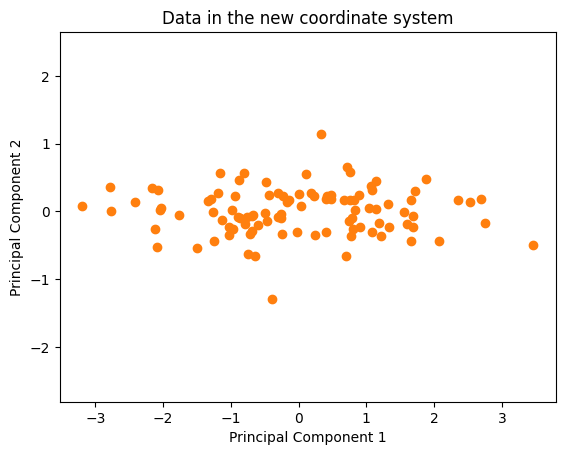

In [16]:
# Show the data in the new coordinate system introduced by the principal components
X_transformed = np.dot(X, Vt.T)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], color='tab:orange')
plt.axis('equal')
plt.title('Data in the new coordinate system')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
